In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_normalized = pd.read_csv("Output/Preprocessed_CC_GENERAL.csv")


In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_normalized)

In [4]:
kmeans_silhouette = silhouette_score(data_normalized, kmeans_labels)


In [5]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_normalized)

In [6]:
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(
        data_normalized[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]
    )
else:
    dbscan_silhouette = -1

In [7]:
print(f"K-means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")

K-means Silhouette Score: 0.2068
DBSCAN Silhouette Score: 0.0732


In [8]:
plt.figure(figsize=(18, 8))


<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

Text(0, 0.5, 'Feature 2')

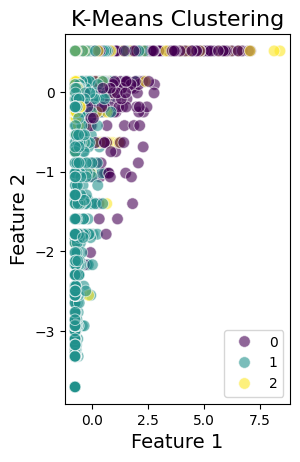

In [9]:
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=data_normalized.iloc[:, 0], 
    y=data_normalized.iloc[:, 1], 
    hue=kmeans_labels, 
    palette="viridis", 
    legend='full',
    s=70,  # Marker size for better visibility
    alpha=0.6  # Transparency for overlapping points
)
plt.title("K-Means Clustering", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)

Text(0, 0.5, 'Feature 2')

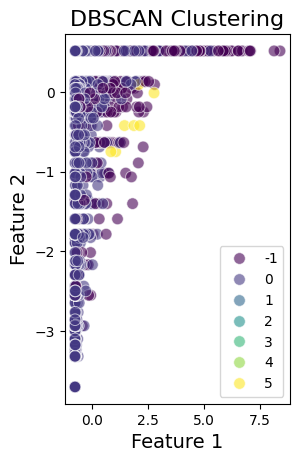

In [10]:
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=data_normalized.iloc[:, 0], 
    y=data_normalized.iloc[:, 1], 
    hue=dbscan_labels, 
    palette="viridis", 
    legend='full',
    s=70,
    alpha=0.6
)
plt.title("DBSCAN Clustering", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)

In [11]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [12]:
if kmeans_silhouette > dbscan_silhouette:
    print("K-means is recommended as it has a higher silhouette score.")
else:
    print("DBSCAN is recommended as it has a higher silhouette score or better noise handling.")

K-means is recommended as it has a higher silhouette score.
